In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df1 = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\T20_2019_1백만.1.csv', encoding = 'euc-kr')
df2 = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\T20_2019_1백만.2.csv', encoding = 'euc-kr')
df3 = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\T20_2019_1백만.3.csv', encoding = 'euc-kr')

In [4]:
df = pd.concat([df1, df2, df3])

In [5]:
df.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2019,1,104243474,2,12,46,20191104,3,5,M751,M750,1,1,0.25,19240,9600,9640,0,20201222
1,2019,1,107479370,2,12,46,20190806,3,1,E1164,N308,1,1,0.25,145680,72800,72880,0,20201222
2,2019,1,106881883,2,12,46,20190920,3,1,N308,E1164,1,1,0.25,13240,6600,6640,3,20201222
3,2019,1,109043837,2,12,46,20190807,2,1,E1164,N308,7,21,0.25,861590,205810,655780,0,20201222
4,2019,1,103174392,2,12,46,20190318,3,13,H6531,J303,1,1,0.15,48440,14500,33940,3,20201222


In [22]:
df.시도코드.value_counts()

41    3201520
11    2369736
26     904748
48     864075
28     719618
47     708023
27     627035
44     590450
46     557498
45     546698
43     438137
30     391779
42     364394
29     349291
31     277661
49     179255
36      88427
Name: 시도코드, dtype: int64

In [6]:
df.isnull().sum()

기준년도          0
가입자 일련번호      0
진료내역일련번호      0
성별코드          0
연령대코드         0
시도코드          0
요양개시일자        0
서식코드          0
진료과목코드        0
주상병코드         0
부상병코드         0
요양일수          0
입내원일수         0
심결가산율         0
심결요양급여비용총액    0
심결본인부담금       0
심결보험자부담금      0
총처방일수         0
데이터 기준일자      0
dtype: int64

In [7]:
df.dtypes

기준년도            int64
가입자 일련번호        int64
진료내역일련번호        int64
성별코드            int64
연령대코드           int64
시도코드            int64
요양개시일자          int64
서식코드            int64
진료과목코드          int64
주상병코드          object
부상병코드          object
요양일수            int64
입내원일수           int64
심결가산율         float64
심결요양급여비용총액      int64
심결본인부담금         int64
심결보험자부담금        int64
총처방일수           int64
데이터 기준일자        int64
dtype: object

In [8]:
main_code = list(set(df.주상병코드.values))
sub_code = list(set(df.부상병코드.values))
len(main_code), len(sub_code)

(9422, 9803)

In [9]:
main_dic = dict(zip(main_code, [x for x in range(len(main_code))]))
sub_dic = dict(zip(sub_code, [x for x in range(len(sub_code))]))

In [10]:
df['주상병코드'] = df['주상병코드'].apply(lambda x: main_dic[x])
df['부상병코드'] = df['부상병코드'].apply(lambda x: sub_dic[x])

In [11]:
df.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2019,1,104243474,2,12,46,20191104,3,5,733,7658,1,1,0.25,19240,9600,9640,0,20201222
1,2019,1,107479370,2,12,46,20190806,3,1,2508,196,1,1,0.25,145680,72800,72880,0,20201222
2,2019,1,106881883,2,12,46,20190920,3,1,187,2611,1,1,0.25,13240,6600,6640,3,20201222
3,2019,1,109043837,2,12,46,20190807,2,1,2508,196,7,21,0.25,861590,205810,655780,0,20201222
4,2019,1,103174392,2,12,46,20190318,3,13,9300,7172,1,1,0.15,48440,14500,33940,3,20201222


In [12]:
df_train = df.iloc[:, 1:-1]
df_train.head()

,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
0,1,104243474,2,12,46,20191104,3,5,733,7658,1,1,0.25,19240,9600,9640,0
1,1,107479370,2,12,46,20190806,3,1,2508,196,1,1,0.25,145680,72800,72880,0
2,1,106881883,2,12,46,20190920,3,1,187,2611,1,1,0.25,13240,6600,6640,3
3,1,109043837,2,12,46,20190807,2,1,2508,196,7,21,0.25,861590,205810,655780,0
4,1,103174392,2,12,46,20190318,3,13,9300,7172,1,1,0.15,48440,14500,33940,3


In [13]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

<AxesSubplot:title={'center':'특성별 피어슨 상관계수'}>

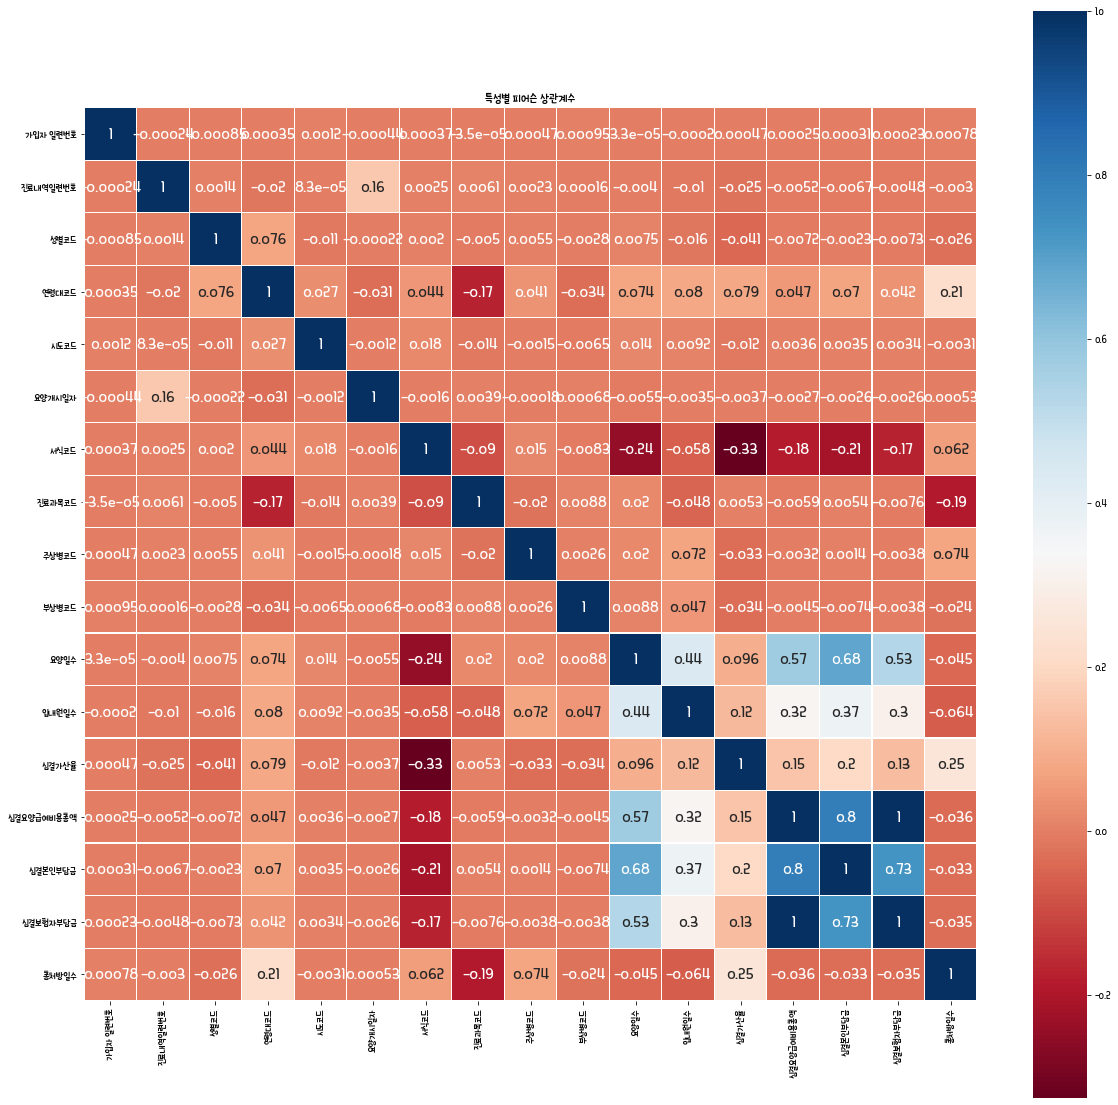

In [14]:
colormap = plt.cm.RdBu
plt.figure(figsize = (20, 20))
plt.title('특성별 피어슨 상관계수')
sns.heatmap(df_train.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {'size' : 16})

In [15]:
df.시도코드.value_counts()

41    3201520
11    2369736
26     904748
48     864075
28     719618
47     708023
27     627035
44     590450
46     557498
45     546698
43     438137
30     391779
42     364394
29     349291
31     277661
49     179255
36      88427
Name: 시도코드, dtype: int64